In [54]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import sklearn
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)


In [2]:
discription = urlopen("http://jse.amstat.org/v19n3/decock/DataDocumentation.txt")
discription=discription.readlines()

In [3]:
cont_col=[]
cat_col=[]
for line in discription:
    
    thisline=str(line)[1:]
    if thisline.find('(Continuous)')!=-1:
        col_name=thisline.split(' (Continuous)')[0]
        cont_col.append(col_name.strip("'"))
        
uvt_ls=cont_col[:-1]
tgt=cont_col[-1]
uvt_ls=[x.replace('-','') for x in uvt_ls]
cont_col=[x.replace('-','') for x in cont_col]

In [4]:
housedata = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls',index_col=0)

# Task 1.1

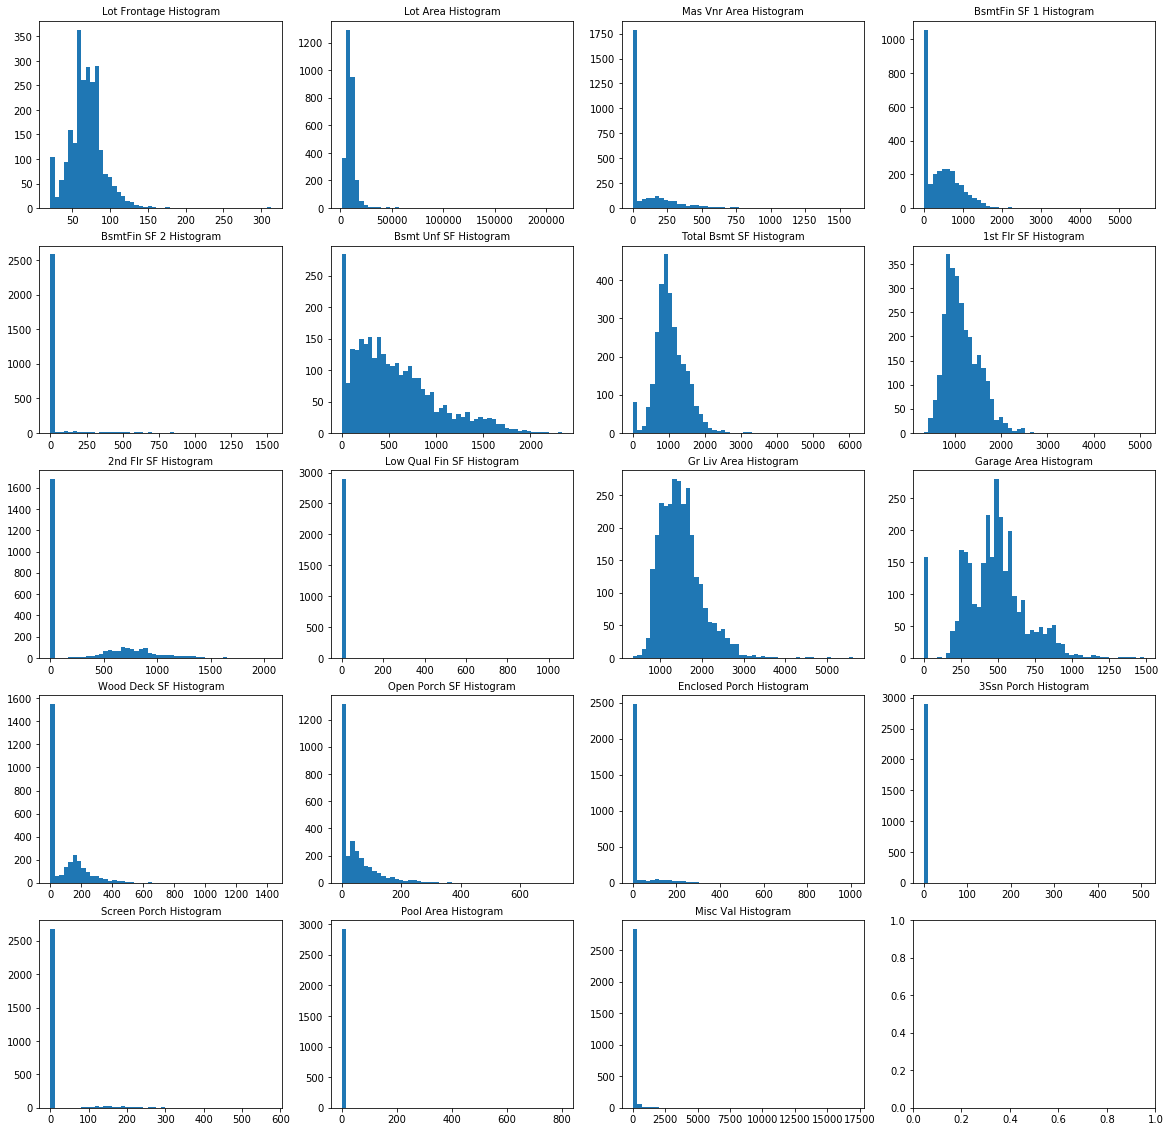

In [5]:
fig, ax = plt.subplots(5,4,figsize=(20,20))
row=0
for uvt in uvt_ls:
    data=[x for x in list(housedata[uvt].values) if not np.isnan(float(x))]
    ax[row//4][row%4].hist(data,bins=50)
    ax[row//4][row%4].set_title(uvt+' Histogram',fontsize=10)
    row+=1

We can see many histograms i.e. Misc Val, Pool Area, Screen Porch and etc. have extremely skewed distributions. Many of them have too many observations of the same value. In this case, we may need to perform some special treatment on them. Maybe we can rescale them or convert them into categorical variables.

# Task 1.2

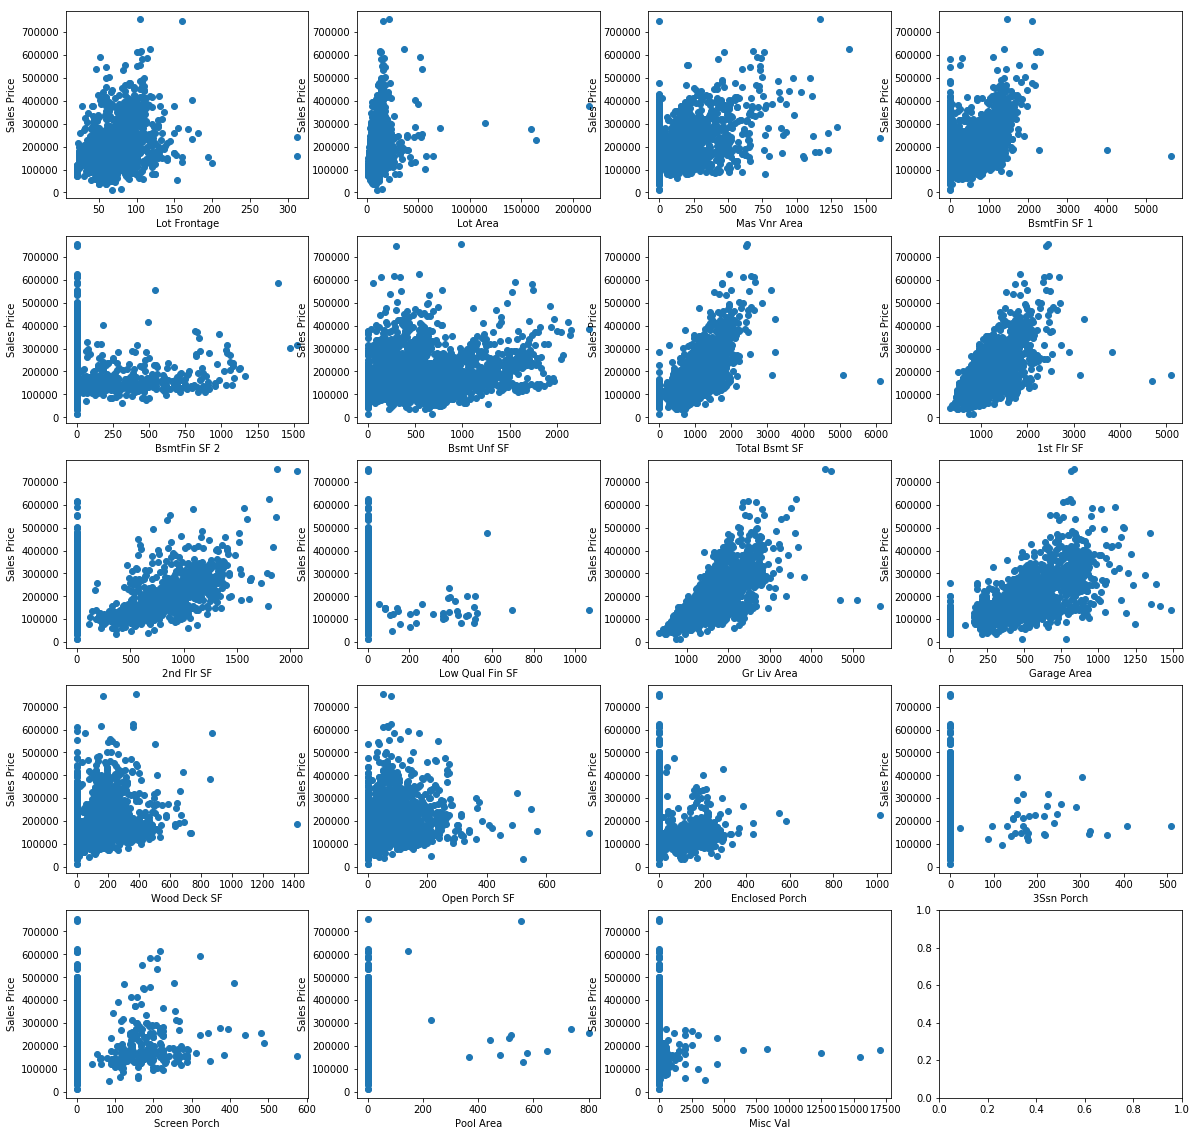

In [6]:
fig, ax = plt.subplots(5,4,figsize=(20,20))
row=0

for uvt in uvt_ls:
    ax[row//4][row%4].scatter(housedata[uvt].values,housedata[tgt].values)
    ax[row//4][row%4].set_ylabel('Sales Price')
    ax[row//4][row%4].set_xlabel(uvt)
    row+=1

In [553]:
housedata.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Task 1.3

In [7]:
# categorical columns list
cat_ls=[x for x in housedata.columns if x not in cont_col and x!='PID']

In [8]:
# Replace na value in categorical columns into a new value 'no_type'
housedata[cat_ls]=housedata[cat_ls].fillna('no_type').copy()

In [9]:
cat_dict={list(housedata.columns[1:-1]).index(x):x for x in cat_ls }
# cat_dict

In [10]:
housedata[cat_ls]=housedata[cat_ls].astype(str)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(housedata[housedata.columns[1:-1]].values, 
                                                    housedata[housedata.columns[-1]].values)


The best R^2 is produced by Overall Qual which equals 0.6976219930020702 on average


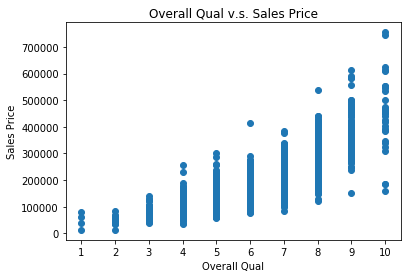

The second best R^2 is produced by Exter Qual which equals 0.5060353860146904 on average


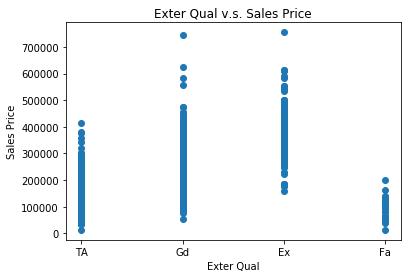

The third best R^2 is produced by Garage Finish which equals 0.3022962942766094 on average


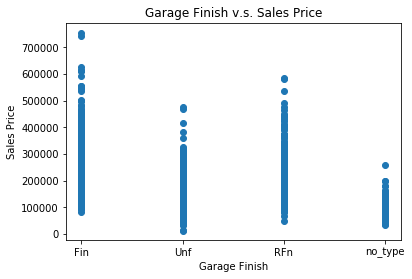

In [62]:
cat_ls2=[]
cat_score=[]
for cat in cat_dict.keys():
    
    to_train=X_train[:,cat].reshape(-1, 1)
    
    
    ohe=OneHotEncoder(categories='auto').fit(to_train)
#     print(cat_dict[cat])
    ohe_train=ohe.transform(to_train).toarray()
    reg = LinearRegression()
    mscore=np.mean(cross_val_score(reg,ohe_train,y_train,cv=5))
    cat_ls2+=[cat_dict[cat]]
#     print(mscore)
    cat_score+=[mscore]
print('The best R^2 is produced by',
      cat_ls2[cat_score.index(max(cat_score))],'which equals',max(cat_score),'on average')
best_f=cat_ls2[cat_score.index(max(cat_score))]
plt.scatter([int(x) for x in housedata[best_f].values],housedata[tgt].values)
plt.title(best_f+' v.s. Sales Price')
plt.xticks(np.arange(1,11))
plt.ylabel('Sales Price')
plt.xlabel(best_f)
plt.show()

cat_score.remove(max(cat_score))
cat_ls2.pop(cat_score.index(max(cat_score)))
print('The second best R^2 is produced by',
      cat_ls2[cat_score.index(max(cat_score))],'which equals',max(cat_score),'on average')
best_f=cat_ls2[cat_score.index(max(cat_score))]
plt.scatter([x for x in housedata[best_f].values],housedata[tgt].values)
plt.title(best_f+' v.s. Sales Price')
plt.ylabel('Sales Price')
plt.xlabel(best_f)
plt.show()

cat_score.remove(max(cat_score))
cat_ls2.pop(cat_score.index(max(cat_score)))
print('The third best R^2 is produced by',
      cat_ls2[cat_score.index(max(cat_score))],'which equals',max(cat_score),'on average')
best_f=cat_ls2[cat_score.index(max(cat_score))]
plt.scatter([x for x in housedata[best_f].values],housedata[tgt].values)
plt.title(best_f+' v.s. Sales Price')
plt.ylabel('Sales Price')
plt.xlabel(best_f)
plt.show()


# Task 1.4

In [13]:
cont_idx=[int(str(x)) for x in np.arange(79) if x not in list(cat_dict.keys())]
cont_idx2=[int(str(x)) for x in np.arange(len(cont_idx)) ]
cat_idx=[int(x) for x in cat_dict.keys()]
cat_idx2=[int(str(x)) for x in np.arange(len(cont_idx),79) ]

In [63]:
preprocess_ipt=make_column_transformer((SimpleImputer(strategy='median'),cont_idx),remainder='passthrough')
preprocess_ohc=make_column_transformer((OneHotEncoder(categories='auto',handle_unknown='ignore'),cat_idx2),
                                       remainder='passthrough')

model_ls=[LinearRegression(),Ridge(),Lasso(),ElasticNet()]                    
for md in model_ls:
    model=Pipeline(steps=[('1',preprocess_ipt),('3',preprocess_ohc),('4',md)])
    print('Without standardScaler, the model ',str(md),'has an average training accuracy of',
          np.mean(cross_val_score(model,X_train,y_train)))


Without standardScaler, the model  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) has an average training accuracy of 0.8612849039695273
Without standardScaler, the model  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) has an average training accuracy of 0.26447809468912614
Without standardScaler, the model  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) has an average training accuracy of 0.8625869362203727
Without standardScaler, the model  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) has an average training accuracy of 0.8417914312962287


In [64]:
preprocess_ipt=make_column_transformer((SimpleImputer(strategy='median'),cont_idx),remainder='passthrough')
preprocess_std=make_column_transformer((StandardScaler(),cont_idx2),remainder='passthrough',sparse_threshold=0)
preprocess_ohc=make_column_transformer((OneHotEncoder(categories='auto',handle_unknown='ignore'),cat_idx2)
                                       ,remainder='passthrough')

model_ls=[LinearRegression(),Ridge(),Lasso(),ElasticNet()]                    
for md in model_ls:
    model=Pipeline(steps=[('1',preprocess_ipt),('2',preprocess_std),('3',preprocess_ohc),('4',md)])
    print('With standardScaler, the model ',str(md),'has an average training accuracy of',
          np.mean(cross_val_score(model,X_train,y_train)))


With standardScaler, the model  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) has an average training accuracy of 0.8549850219382934
With standardScaler, the model  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) has an average training accuracy of 0.8872724984277406
With standardScaler, the model  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) has an average training accuracy of 0.8626155710008346
With standardScaler, the model  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) has an average training accuracy of 0.8440136749902907


As we can see, standard scaler only significantly improves the results in Ridge Regression. 
With standard scaler and using all default parameters, ridge regression has the best training accuracy in cross validation, which is 0.87. All other models have a similar accuracy around 0.84.

Without standard scaler, ridge regression performs very bad while other models still produces an accuracy around 0.84.

# Task 1.5

In [65]:
param_grid = {'rg__alpha': np.logspace(-2, 2, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),('rg',Ridge())])
search_ridge = GridSearchCV(preprocess_iso, param_grid, iid=False, cv=10,
                      return_train_score=False)
search_ridge.fit(X_train, y_train)
print(search_ridge.best_params_)

param_grid = {'rg__alpha': np.logspace(-2, 2, 10)}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),('rg',Lasso())])
search_lasso = GridSearchCV(preprocess_iso, param_grid, iid=False, cv=10,
                      return_train_score=False)
search_lasso.fit(X_train, y_train)
print(search_lasso.best_params_)


param_grid = {'rg__alpha': np.logspace(-2, 2, 10),'rg__l1_ratio': [0.01, .1, .5, .9, .98, 1]}
preprocess_iso=Pipeline(steps=[('ipt',preprocess_ipt),('std',preprocess_std),('ohc',preprocess_ohc),('rg',ElasticNet())])
search_net = GridSearchCV(preprocess_iso, param_grid, iid=False, cv=10,
                      return_train_score=False)
search_net.fit(X_train, y_train)
print(search_net.best_params_)




{'rg__alpha': 4.6415888336127775}
{'rg__alpha': 35.93813663804626}
{'rg__alpha': 35.93813663804626, 'rg__l1_ratio': 1}


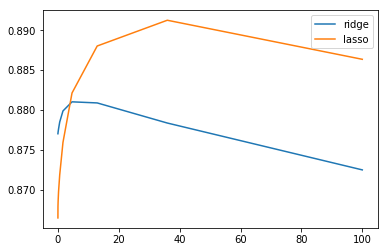

In [66]:
para_ls=search_ridge.cv_results_['param_rg__alpha'].data
score_ls=search_ridge.cv_results_['mean_test_score']
plt.plot(para_ls,score_ls,label='ridge')
para_ls=search_lasso.cv_results_['param_rg__alpha'].data
score_ls=search_lasso.cv_results_['mean_test_score']
plt.plot(para_ls,score_ls,label='lasso')
plt.legend()
plt.show()

This graph shows that in ridge regression, having $\alpha \approx 4.64$ produces the highest average accuracy $0.880$; in lasso regression,  having $\alpha \approx 36$ produces the highest average accuracy $0.89$. Therefore, using the best parameter improves the results for ridge and lasso model.

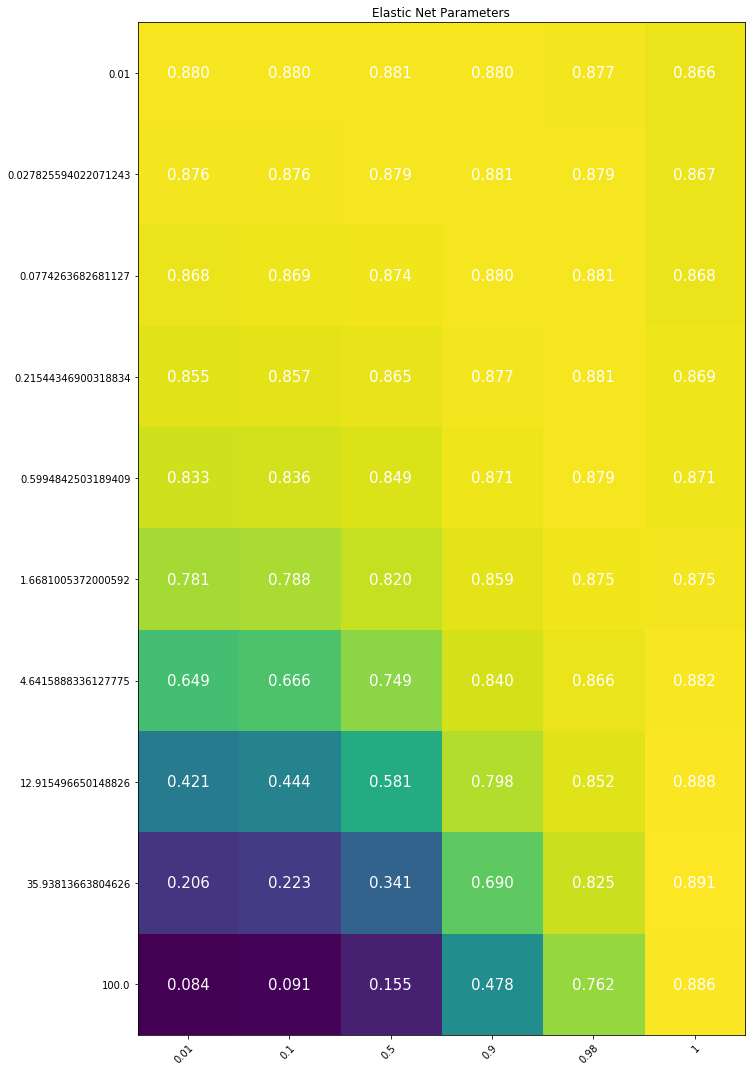

In [67]:


alpha_ls = sorted(list(set(search_net.cv_results_['param_rg__alpha'].data)))
l1_ls = search_net.cv_results_['param_rg__l1_ratio'].data[:6]
score_mtx = search_net.cv_results_['mean_test_score'].reshape(10,6)

fig, ax = plt.subplots(figsize=(15,15))

im = ax.imshow(score_mtx)

# We want to show all ticks...
ax.set_yticks(np.arange(len(alpha_ls)))
ax.set_xticks(np.arange(len(l1_ls)))
# ... and label them with the respective list entries
ax.set_yticklabels(alpha_ls)
ax.set_xticklabels(l1_ls)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(alpha_ls)):
    for j in range(len(l1_ls)):
        text = ax.text(j, i, str(score_mtx[i, j])[:5],
                       ha="center", va="center", color="w",fontsize=15)

ax.set_title("Elastic Net Parameters")
fig.tight_layout()
plt.show()

This graph shows that in ElasticNet regression, having $\alpha \approx 35.93$ produces the highest average accuracy; in lasso regression,  having $\lambda \leq 1$ produces the highest average accuracy 0.891, which is equavelent to using a pure lasso regression with $\alpha \approx 35.93$

The results all improved a lot and all the regressions reach the accuracy of 0.88 or abrove which is higher than using default parameters.

In [68]:
cat_fn=search_ridge.best_estimator_.steps[2][1].named_transformers_['onehotencoder'].get_feature_names()
cot_fn=uvt_ls
all_fn=list(cat_fn)+list(cot_fn)

In [71]:
ridge_coef = search_ridge.best_estimator_.named_steps['rg'].coef_
lasso_coef = search_lasso.best_estimator_.named_steps['rg'].coef_
net_coef = search_net.best_estimator_.named_steps['rg'].coef_
coef_df=pd.DataFrame(np.transpose([all_fn,ridge_coef,lasso_coef,net_coef]))
coef_df[[1,2,3]]=coef_df[[1,2,3]].astype(float)
coef_df['same_sign']=0
coef_df.loc[(np.sign(coef_df[1])==np.sign(coef_df[2]))&(np.sign(coef_df[1])==np.sign(coef_df[3])),'same_sign']=1
coef_df['product']=abs(coef_df[1]*coef_df[2]*coef_df[3])

In [78]:
selected_df=coef_df[coef_df['same_sign']==1].sort_values('product',ascending=False).head(20)


In this task, to get the coefficients which are important in all models, I first get the coefficients for features for all models i.e. a,b,c from ridge, lasso, elasticnet.
Then I calculate the abs(a*b*c) and sort this product from the largest to smallest. The idea is that if all models favor one feature, their coefficient should be close to each other, thus they will have a high product in a scaled scenario. Since there are too many features, I will only plot the top 10 features with the highest product which also share the same sign.
Here is the plot:


In [79]:
rig_data=selected_df[1].values[:20]
lasso_data=selected_df[2].values[:20]
net_data=selected_df[3].values[:20]
featurenm=selected_df[0].values[:20]

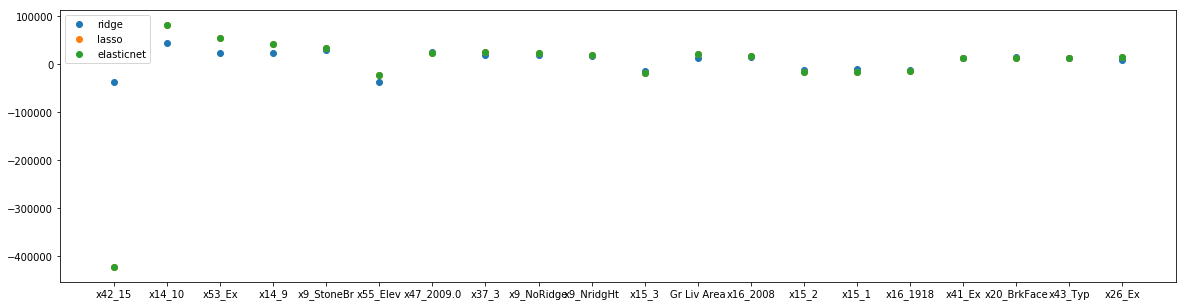

In [80]:
plt.figure(figsize=(20,5))
plt.scatter(featurenm,rig_data,label='ridge')
plt.scatter(featurenm,lasso_data,label='lasso')
plt.scatter(featurenm,net_data,label='elasticnet')
plt.legend()

Since we use l1=1 in elasticnet, it equals to lasso regression, therefore, the coefficients in elasticnet is same as those in lasso regression. Therefore, points from lasso and elasticnet overlap. As we can see, for the top 20 most agree features, the estimators in both ridge and lasso are very close, which means they do agree on some features that are important. Next, we are going to plot the coefficients without any sign constrain to see if they have similar coefficients with large magnitude.

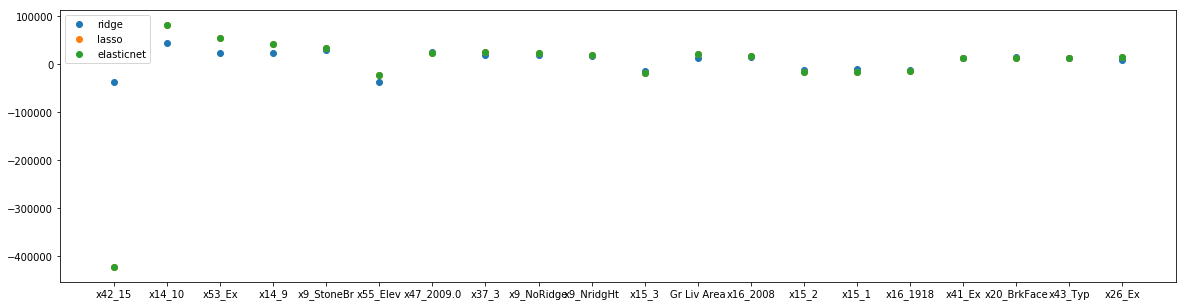

In [81]:
selected_df=coef_df.sort_values('product',ascending=False).head(20)
rig_data=selected_df[1].values[:20]
lasso_data=selected_df[2].values[:20]
net_data=selected_df[3].values[:20]
featurenm=selected_df[0].values[:20]
plt.figure(figsize=(20,5))
plt.scatter(featurenm,rig_data,label='ridge')
plt.scatter(featurenm,lasso_data,label='lasso')
plt.scatter(featurenm,net_data,label='elasticnet')
plt.legend()

As we can see, even without the sign constrain, the coefficients for estimators are still very close to each other. Which means they agree on the most important features.

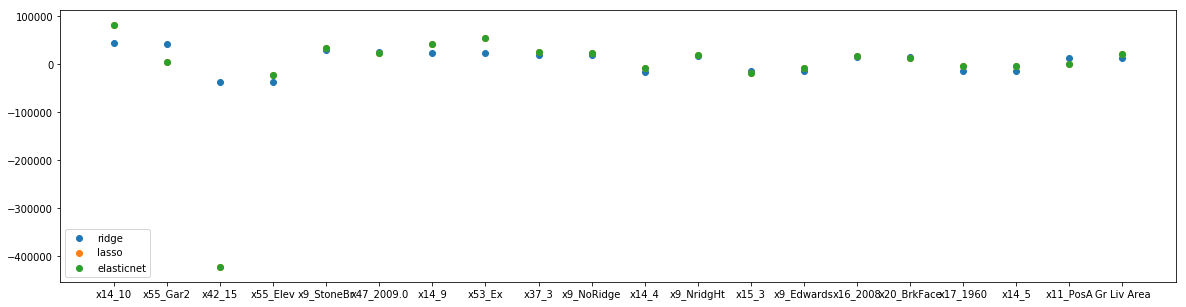

In [84]:
coef_df['ridge_abs']=abs(coef_df[1])

selected_df=coef_df.sort_values('ridge_abs',ascending=False).head(20)
rig_data=selected_df[1].values[:20]
lasso_data=selected_df[2].values[:20]
net_data=selected_df[3].values[:20]
featurenm=selected_df[0].values[:20]
plt.figure(figsize=(20,5))
plt.scatter(featurenm,rig_data,label='ridge')
plt.scatter(featurenm,lasso_data,label='lasso')
plt.scatter(featurenm,net_data,label='elasticnet')
plt.legend()

This graph plots the 20 largest absolute value coefficient for ridge regression. As we can see, in lasso and elasticnet, the same features have a similar value. 

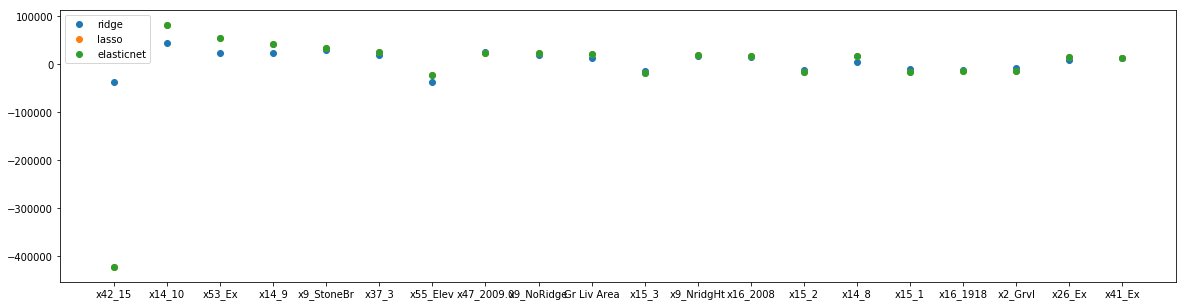

In [85]:
coef_df['lasso_abs']=abs(coef_df[2])

selected_df=coef_df.sort_values('lasso_abs',ascending=False).head(20)
rig_data=selected_df[1].values[:20]
lasso_data=selected_df[2].values[:20]
net_data=selected_df[3].values[:20]
featurenm=selected_df[0].values[:20]
plt.figure(figsize=(20,5))
plt.scatter(featurenm,rig_data,label='ridge')
plt.scatter(featurenm,lasso_data,label='lasso')
plt.scatter(featurenm,net_data,label='elasticnet')
plt.legend()

This graph plots the 20 largest absolute value coefficient for lasso regression. As we can see, in ridge and elasticnet, the same features have a similar value. 

#### In conclusion, all these models agree on the most important features.